In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix
warnings.filterwarnings("ignore")

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is FEA4-9C8F

 Directory of C:\Users\mrsks\OneDrive\Desktop\Data Science - Somnath\Assignments - Final\KNN

17-07-2022  02:01    <DIR>          .
17-07-2022  01:50    <DIR>          ..
17-07-2022  02:01    <DIR>          .ipynb_checkpoints
17-07-2022  01:50            10,053 glass.csv
17-07-2022  02:00         1,076,030 glass_KNN Model.ipynb
17-07-2022  01:50               550 problem_statement(Glass).txt
17-07-2022  01:50                62 Problem_Statement(Zoo).txt
17-07-2022  02:01                72 Untitled.ipynb
17-07-2022  01:50             4,600 Zoo.csv
               6 File(s)      1,091,367 bytes
               3 Dir(s)  424,156,848,128 bytes free


In [3]:
zoo=pd.read_csv("Zoo.csv")
zoo.head(30)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [4]:
zoo.shape

(101, 18)

Text(0, 0.5, 'Count')

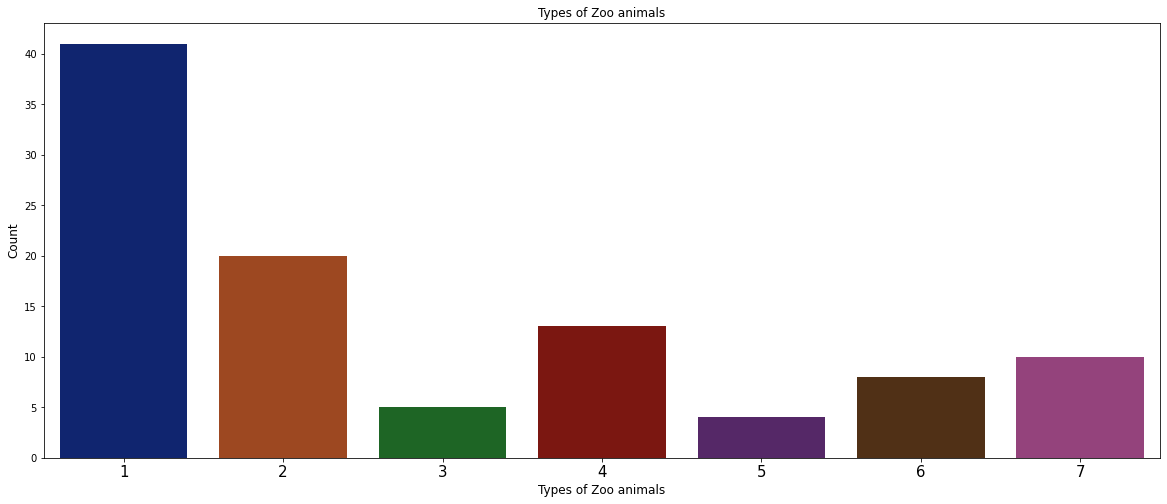

In [5]:
plt.figure(figsize=(20, 8))
    
plt.title("Types of Zoo animals")
sns.countplot(data=zoo, x="type",palette = "dark")
plt.xticks(rotation = 0, size = 15)
plt.xlabel("Types of Zoo animals", fontsize=12)
plt.ylabel("Count", fontsize=12)

<AxesSubplot:>

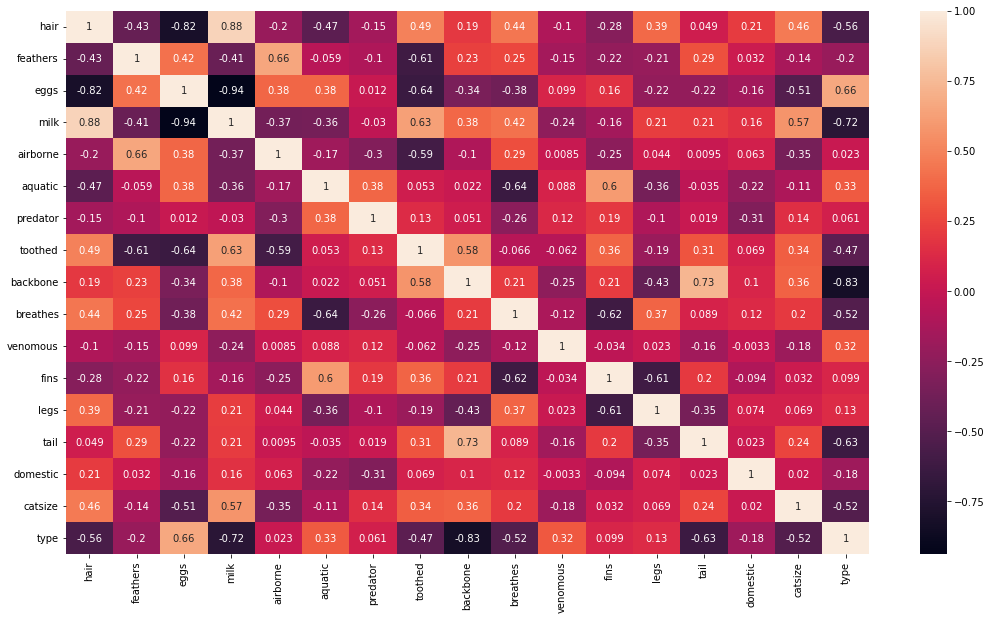

In [6]:
plt.figure(figsize=(18,10))
sns.heatmap(zoo.corr(),annot=True)

Text(0.5, 1.0, 'Correlation with zoo animal type \n')

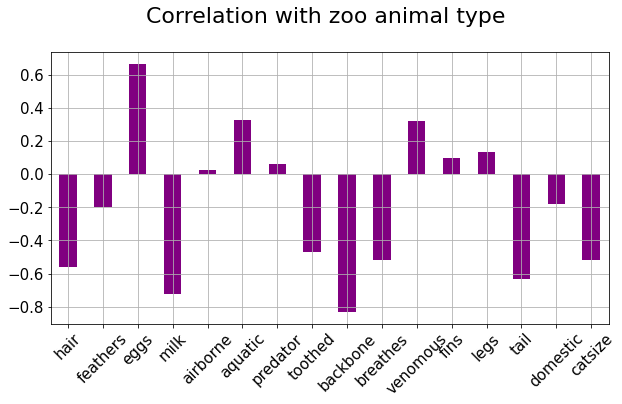

In [7]:
Data = zoo.iloc[:,:-1]

correlations = Data.corrwith(zoo.type)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (10, 5), 
        fontsize = 15, 
        color = 'purple',
        rot = 45, grid = True)
plt.title('Correlation with zoo animal type \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

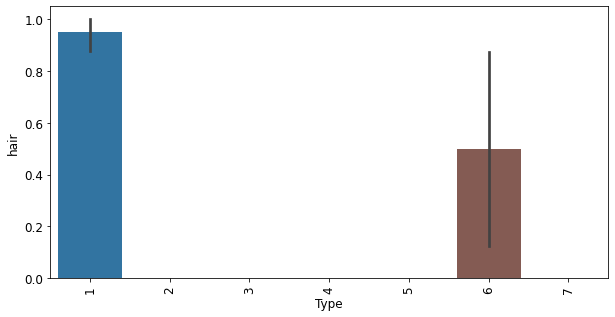

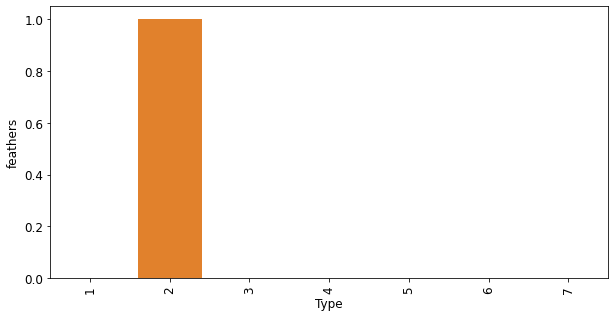

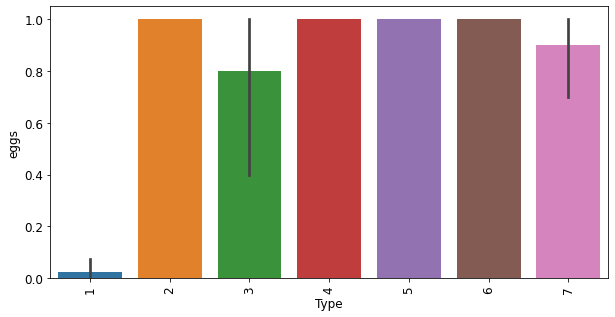

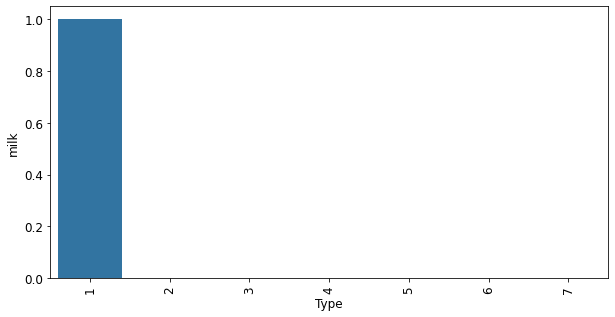

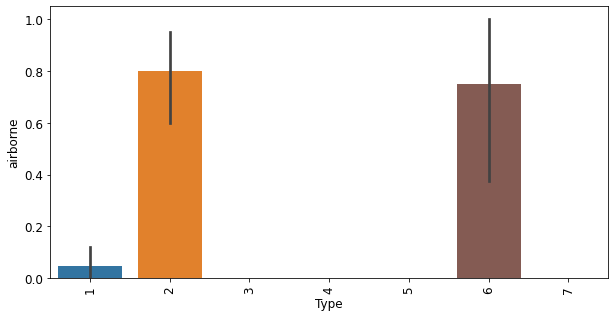

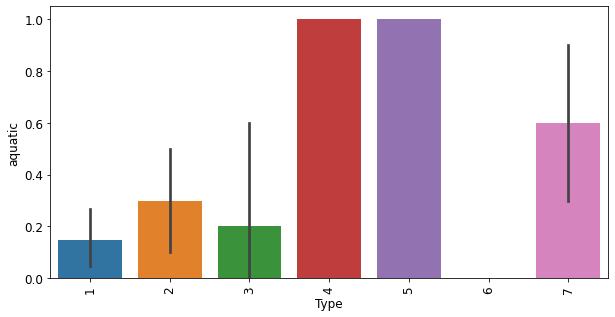

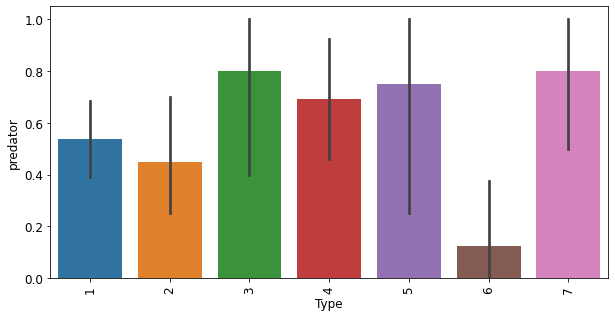

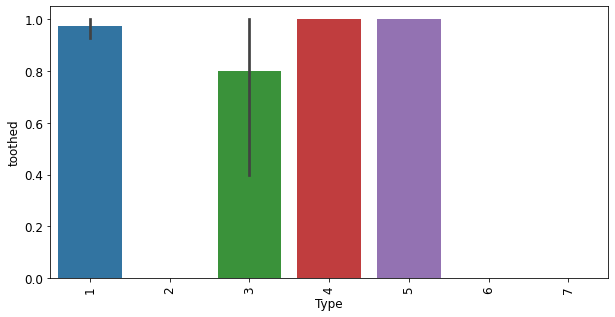

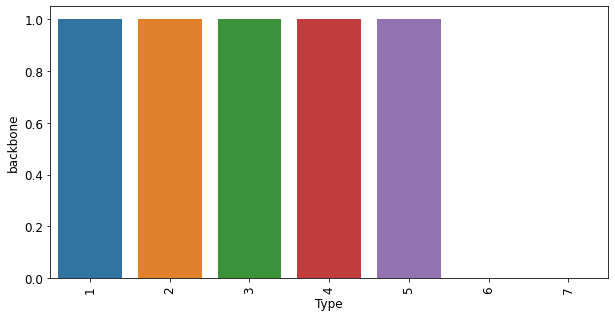

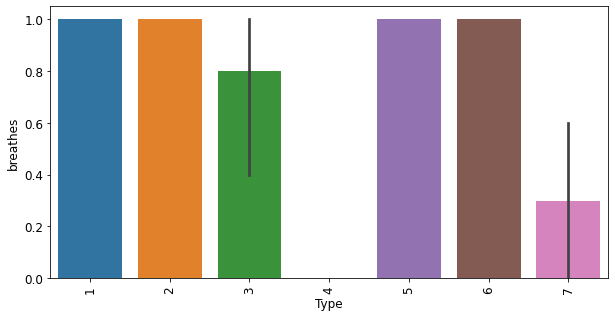

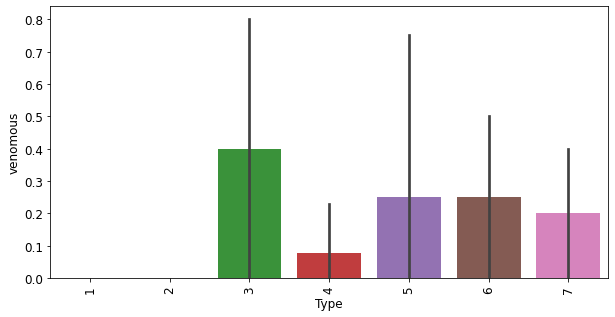

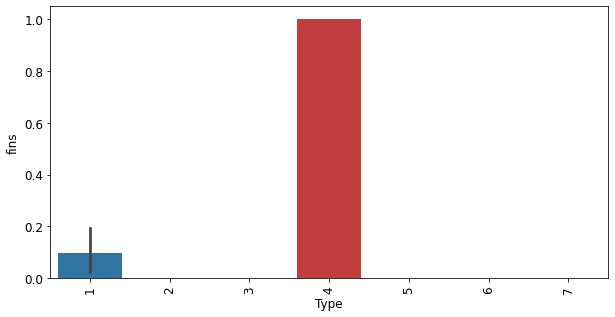

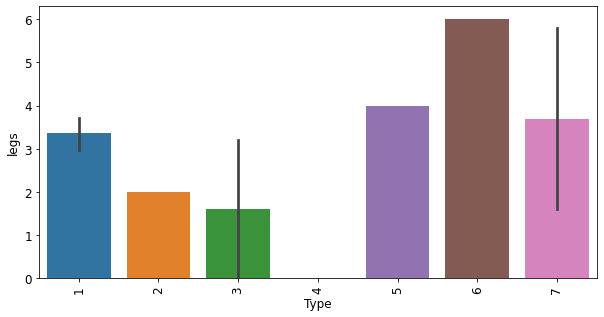

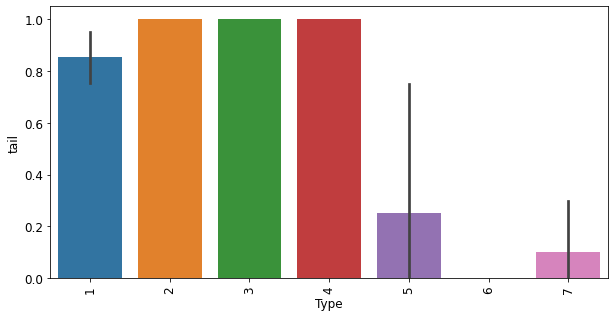

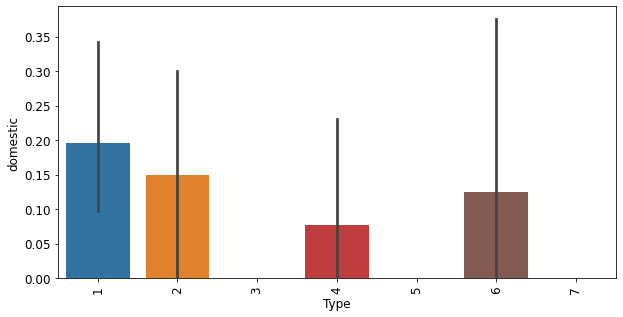

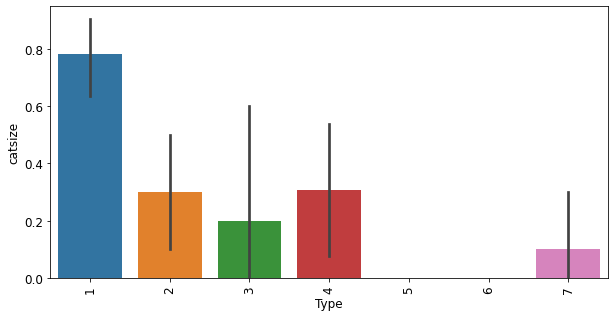

In [8]:
for i in zoo.columns[1:-1]:
    plt.figure(figsize=(10,5))
    sns.barplot(x = 'type', y= i,data = zoo)
    plt.xticks(rotation = 90, size = 12)
    plt.yticks(size = 12)
    plt.xlabel('Type',fontsize=12)
    plt.ylabel(i, fontsize=12)

    plt.show()

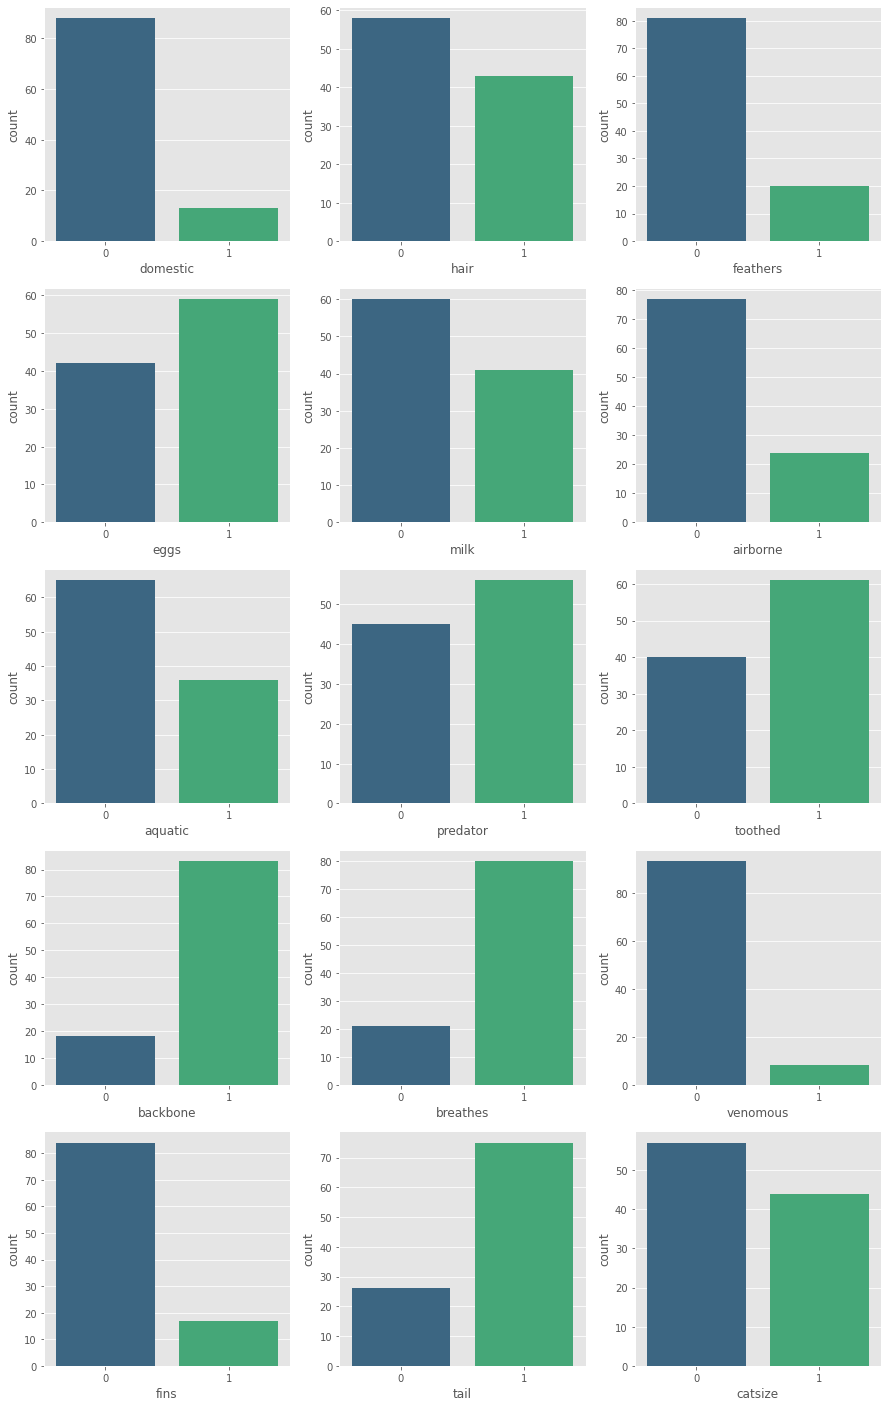

In [9]:
plt.style.use("ggplot")
fig, ax =plt.subplots(5,3, figsize=(15,25)) 

sns.countplot(zoo["domestic"], palette="viridis", ax=ax[0,0])
sns.countplot(zoo["hair"], palette="viridis", ax=ax[0,1])
sns.countplot(zoo["feathers"], palette="viridis", ax=ax[0,2])

sns.countplot(zoo["eggs"], palette="viridis", ax=ax[1,0])
sns.countplot(zoo["milk"], palette="viridis", ax=ax[1,1])
sns.countplot(zoo["airborne"], palette="viridis", ax=ax[1,2])

sns.countplot(zoo["aquatic"], palette="viridis", ax=ax[2,0])
sns.countplot(zoo["predator"], palette="viridis", ax=ax[2,1])
sns.countplot(zoo["toothed"], palette="viridis", ax=ax[2,2])

sns.countplot(zoo["backbone"], palette="viridis", ax=ax[3,0])
sns.countplot(zoo["breathes"], palette="viridis", ax=ax[3,1])
sns.countplot(zoo["venomous"], palette="viridis", ax=ax[3,2])

sns.countplot(zoo["fins"], palette="viridis", ax=ax[4,0])
sns.countplot(zoo["tail"], palette="viridis", ax=ax[4,1])
sns.countplot(zoo["catsize"], palette="viridis", ax=ax[4,2]);

In [10]:
zoo_data = zoo.drop('animal name', axis = 1)
zoo_data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [11]:
X = zoo_data.drop('type', axis = 1)
y = zoo_data['type']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

In [13]:
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (75, 16)
Shape of X_test:  (26, 16)
Shape of y_train:  (75,)
Shape of y_test:  (26,)


In [14]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

pred = model.predict(X_test)
acc= accuracy_score(y_test,pred)
print("The accuracy is  {}".format(acc))

The accuracy is  0.9615384615384616


Classification Report                precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         5
           3       0.00      0.00      0.00         1
           4       0.83      1.00      0.91         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.96        26
   macro avg       0.83      0.86      0.84        26
weighted avg       0.93      0.96      0.94        26



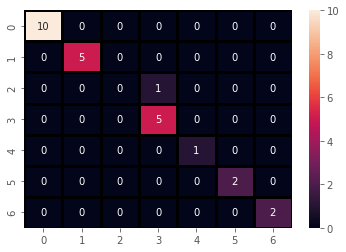

In [15]:
sns.heatmap(confusion_matrix(y_test, pred),annot=True,fmt = "d",linecolor="k",linewidths=3)
print('Classification Report ',classification_report(y_test,pred))

In [16]:
pred_df = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred})
pred_df

,Actual,Predicted
26,5,5
86,4,4
2,4,4
55,1,1
75,1,1
94,1,1
16,2,2
73,4,4
54,1,1
96,1,1


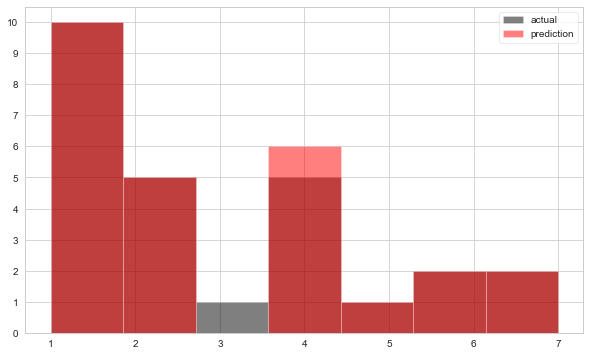

In [17]:
sns.set_style('whitegrid')

plt.rcParams['figure.figsize'] = (10, 6) 
_, ax = plt.subplots()
ax.hist(y_test, color = 'black', alpha = 0.5, label = 'actual', bins=7)
ax.hist(pred, color = 'red', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()

Text(0, 0.5, 'Error Rate')

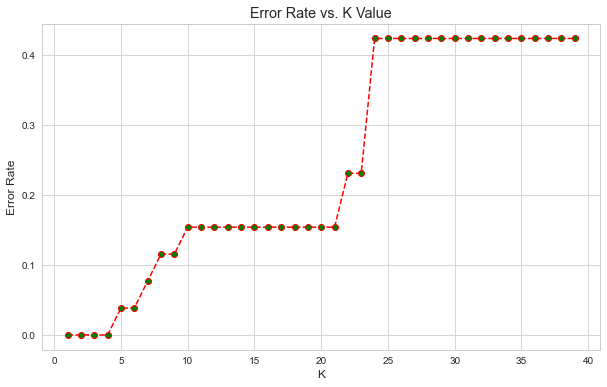

In [18]:
err_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict=knn.predict(X_test)
    err_rate.append(np.mean(predict!=y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),err_rate,color='red', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=6)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

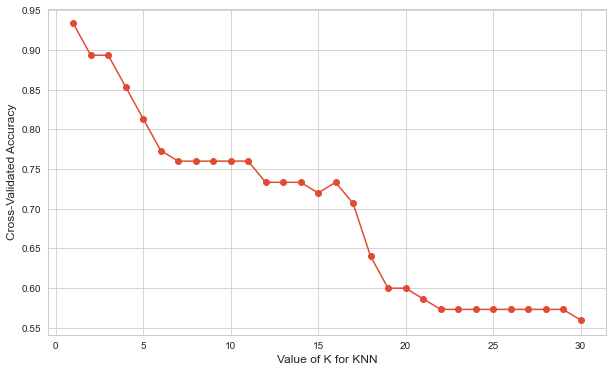

In [19]:
import matplotlib.pyplot as plt 
%matplotlib inline

# choose k between 1 to 41
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(10,6))
plt.plot(k_range, k_scores, marker ="o")
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [20]:
# parameters selection
kf = KFold(n_splits=15)
grid_params ={
    'n_neighbors':[1,2,3,4,5,6],
    'weights':['uniform','distance'],
    'metric' :['eclidean', 'manhattan']
}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose =10, cv=6,n_jobs=-1)
gs_results = gs.fit(X_train, y_train)

Fitting 6 folds for each of 24 candidates, totalling 144 fits


In [21]:
gs_results.best_score_

0.9476495726495727

In [22]:
gs_results.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [23]:
model_final = gs_results.best_estimator_


pred_final = model_final.predict(X_test)
acc_final= accuracy_score(y_test,pred_final)
print("The accuracy is  {}".format(acc_final))

The accuracy is  1.0


Classification Report                precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



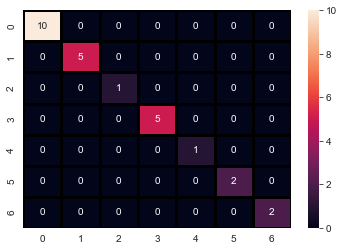

In [24]:
sns.heatmap(confusion_matrix(y_test, pred_final),annot=True,fmt = "d",linecolor="k",linewidths=3)
print('Classification Report ',classification_report(y_test,pred_final))